In [2]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Read dataset file .CSV through Pandas 
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/country_vaccinations.csv')

# Rertrive first 5 rows of dataset
dataset.head(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,22/02/2021,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
1,Afghanistan,AFG,23/02/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
2,Afghanistan,AFG,24/02/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
3,Afghanistan,AFG,25/02/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
4,Afghanistan,AFG,26/02/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...


In [3]:
# Show information of dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14230 entries, 0 to 14229
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              14230 non-null  object 
 1   iso_code                             14230 non-null  object 
 2   date                                 14230 non-null  object 
 3   total_vaccinations                   8486 non-null   float64
 4   people_vaccinated                    7850 non-null   float64
 5   people_fully_vaccinated              5732 non-null   float64
 6   daily_vaccinations_raw               7101 non-null   float64
 7   daily_vaccinations                   14033 non-null  float64
 8   total_vaccinations_per_hundred       8486 non-null   float64
 9   people_vaccinated_per_hundred        7850 non-null   float64
 10  people_fully_vaccinated_per_hundred  5732 non-null   float64
 11  daily_vaccinations_per_milli

In [4]:
# Group data by country specifically United States
UnitedStates = dataset.loc[dataset.country == 'United States']
print(UnitedStates.head())
print(UnitedStates.isna().sum())

             country  ...                                     source_website
13713  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
13714  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
13715  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
13716  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...
13717  United States  ...  https://covid.cdc.gov/covid-data-tracker/#vacc...

[5 rows x 15 columns]
country                                 0
iso_code                                0
date                                    0
total_vaccinations                     14
people_vaccinated                      15
people_fully_vaccinated                29
daily_vaccinations_raw                 24
daily_vaccinations                      1
total_vaccinations_per_hundred         14
people_vaccinated_per_hundred          15
people_fully_vaccinated_per_hundred    29
daily_vaccinations_per_million          1
vaccines   

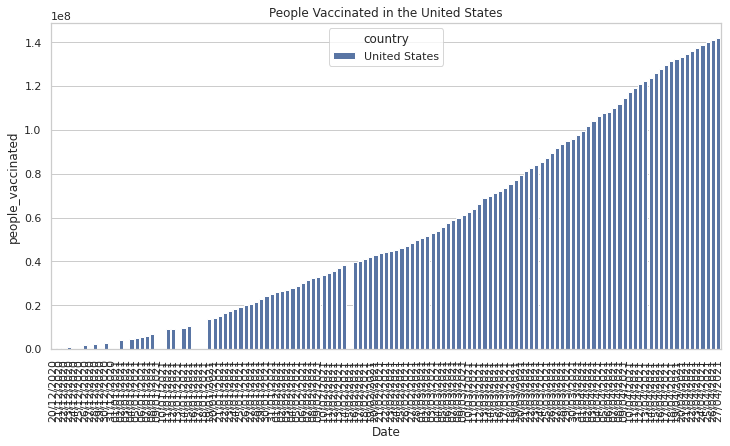

In [5]:
# Plot people vaccinated in the United States
sns.set(rc={'figure.figsize':(12,6)})
sns.set_theme(style="whitegrid")
plot = sns.barplot(x='date',y='people_vaccinated' ,data=UnitedStates,hue='country')
plt.title('People Vaccinated in the United States')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.xlabel('Date')
plt.show()

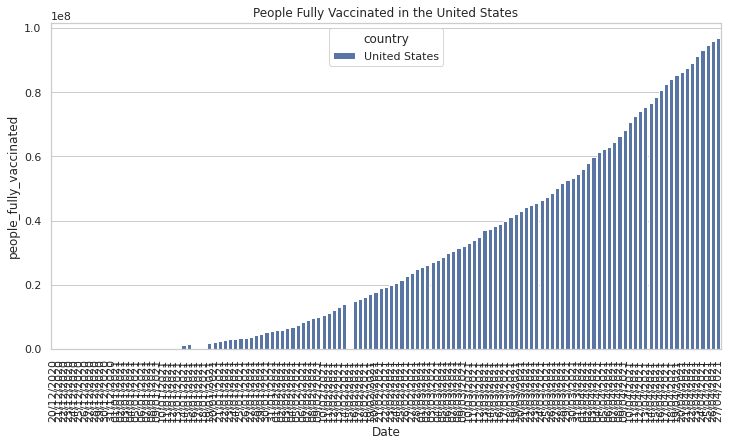

In [6]:
# Fully Vaccinated People 
sns.set(rc={'figure.figsize':(12,6)})
sns.set_theme(style="whitegrid")
plot = sns.barplot(x='date',y='people_fully_vaccinated' ,data=UnitedStates,hue='country')
plt.title('People Fully Vaccinated in the United States')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.xlabel('Date')
plt.show()

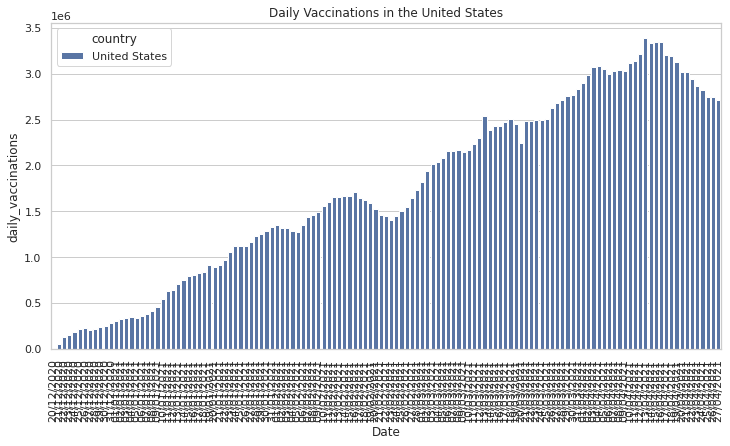

In [7]:

sns.set(rc={'figure.figsize':(12,6)})
sns.set_theme(style="whitegrid")
plot = sns.barplot(x='date',y='daily_vaccinations' ,data=UnitedStates,hue='country')
plt.title('Daily Vaccinations in the United States')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.xlabel('Date')
plt.show()

In [8]:
# Show number of days 
print('Total Number of Days: ', len(UnitedStates.date.unique()))

Total Number of Days:  129


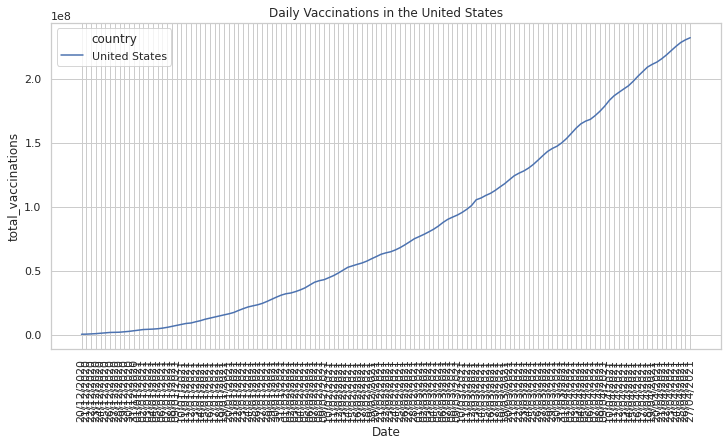

In [9]:

sns.set(rc={'figure.figsize':(12,6)})
sns.set_theme(style="whitegrid")
plot = sns.lineplot(x=UnitedStates.date,y='total_vaccinations' ,data=UnitedStates,hue='country')
plt.title('Daily Vaccinations in the United States')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.xlabel('Date')
plt.show()

In [10]:
# Show Number of vaccinated people
print('Number of Vaccinated People: ', UnitedStates.people_vaccinated.sum())

Number of Vaccinated People:  6928930376.0


129
(129, 15)
       total_vaccinations  ...  daily_vaccinations_per_million
count        1.290000e+02  ...                      129.000000
mean         9.163268e+07  ...                     5251.382812
std          6.648438e+07  ...                     2918.751555
min          5.562080e+05  ...                      173.000000
25%          3.387825e+07  ...                     2917.000000
50%          9.163268e+07  ...                     4951.000000
75%          1.366847e+08  ...                     7847.000000
max          2.324077e+08  ...                    10120.000000

[8 rows x 9 columns]
vaccines
Johnson&Johnson    19
Moderna            70
Pfizer/BioNTech    40
dtype: int64
Algorithm Comparison: _________________
LR: 0.806364 (0.086917)
LDA: 0.882727 (0.106674)
KNN: 0.923636 (0.055922)
CART: 0.883636 (0.086129)
NB: 0.894545 (0.065707)
SVM: 0.515455 (0.048795)


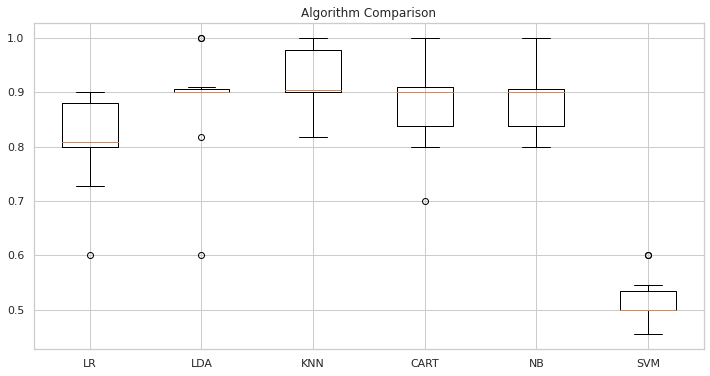

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import math as math


data2 = UnitedStates
print(len(data2))
print(data2.shape)
print(data2.describe())
print(data2.groupby('vaccines').size())

vals = pd.to_numeric(data2['total_vaccinations'], errors='coerce')
data2["total_vaccinations"] = vals.fillna(vals.mean())

vals = pd.to_numeric(data2['people_vaccinated'], errors='coerce')
data2["people_vaccinated"] = vals.fillna(vals.mean())

vals = pd.to_numeric(data2['people_fully_vaccinated'], errors='coerce')
data2["people_fully_vaccinated"] = vals.fillna(vals.mean())

vals = pd.to_numeric(data2['daily_vaccinations_raw'], errors='coerce')
data2["daily_vaccinations_raw"] = vals.fillna(vals.mean())

vals = pd.to_numeric(data2['daily_vaccinations'], errors='coerce')
data2["daily_vaccinations"] = vals.fillna(vals.mean())

vals = pd.to_numeric(data2['total_vaccinations_per_hundred'], errors='coerce')
data2["total_vaccinations_per_hundred"] = vals.fillna(vals.mean())

vals = pd.to_numeric(data2['people_vaccinated_per_hundred'], errors='coerce')
data2["people_vaccinated_per_hundred"] = vals.fillna(vals.mean())

vals = pd.to_numeric(data2['people_fully_vaccinated_per_hundred'], errors='coerce')
data2["people_fully_vaccinated_per_hundred"] = vals.fillna(vals.mean())

vals = pd.to_numeric(data2['daily_vaccinations_per_million'], errors='coerce')
data2["daily_vaccinations_per_million"] = vals.fillna(vals.mean())

array = data2.values
X = array[:,3:7]
y = array[:,12]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

#print(X_train, X_validation, Y_train, Y_validation)
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

print('Algorithm Comparison: _________________')
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print('Classification Report of KNN Algorithm: ______')
print(classification_report(Y_validation, predictions))

0.9230769230769231
[[ 4  0  0]
 [ 2 12  0]
 [ 0  0  8]]
Classification Report of KNN Algorithm: ______
                 precision    recall  f1-score   support

Johnson&Johnson       0.67      1.00      0.80         4
        Moderna       1.00      0.86      0.92        14
Pfizer/BioNTech       1.00      1.00      1.00         8

       accuracy                           0.92        26
      macro avg       0.89      0.95      0.91        26
   weighted avg       0.95      0.92      0.93        26



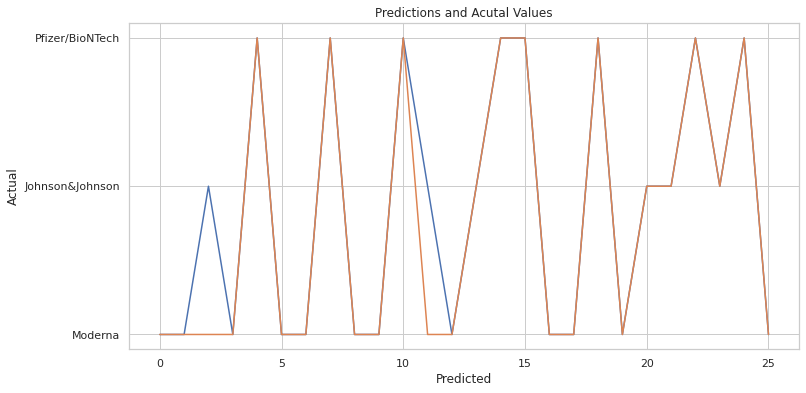

In [15]:
#visualize
plt.plot(predictions)
plt.plot(Y_validation)
plt.title('Predictions and Acutal Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

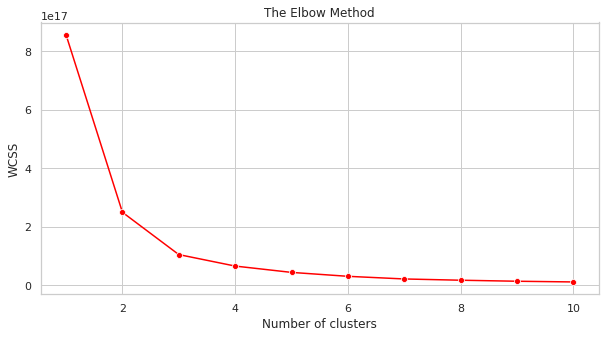

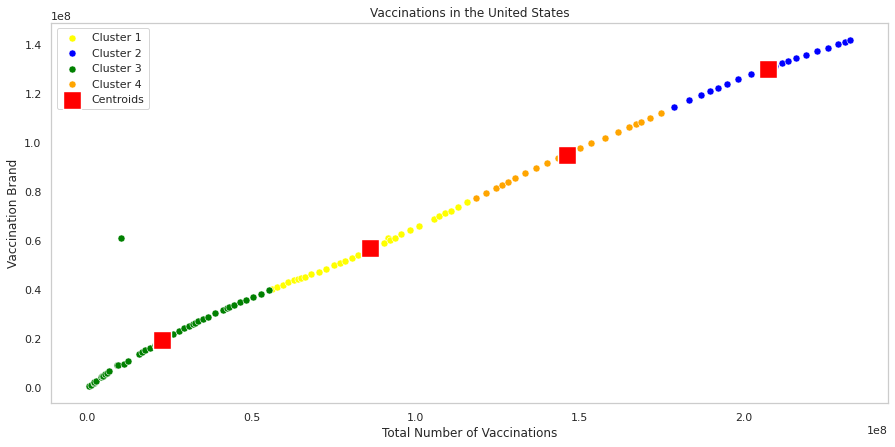

In [16]:
from sklearn.cluster import KMeans
import seaborn as sns
#X = data2.iloc[:, [4, 5]].values
#Xx = array[3:,6:7]
array = UnitedStates.values

X_dataset_kmean = array[:,3:7]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_dataset_kmean)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_dataset_kmean)

# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(X_dataset_kmean[y_kmeans == 0, 0], X_dataset_kmean[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X_dataset_kmean[y_kmeans == 1, 0], X_dataset_kmean[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X_dataset_kmean[y_kmeans == 2, 0], X_dataset_kmean[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'orange', label = 'Cluster 4',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Vaccinations in the United States')
plt.xlabel('Total Number of Vaccinations')
plt.ylabel('Vaccination Brand')
plt.legend()
plt.show()